## Benchmark Functions

In [1]:
import matplotlib.pyplot as plt

def plot_heatmap(test_result, ticker, x_label, y_label):
    fig, ax = plt.subplots(figsize=(10, 10))
    #plt.figure(figsize=(16, 16))
    #plt.figure(figsize=(16, 16))
    im = ax.imshow(test_result, cmap='RdYlGn')

    # We want to show all ticks...
    ax.set_yticks(np.arange(len(x_label)))
    ax.set_xticks(np.arange(len(y_label)))
    # ... and label them with the respective list entries
    ax.set_yticklabels(x_label)
    ax.set_xticklabels(y_label)

    # Rotate the tick labels and set their alignment.
    plt.setp(ax.get_xticklabels(), rotation=45, ha="right",
         rotation_mode="anchor")

    # Loop over data dimensions and create text annotations.
    for i in range(len(x_label)):
        for j in range(len(y_label)):
            text = ax.text(j, i, "{0:.2f}%".format(test_result[i][j]),
                       ha="center", va="center", color="w")

    ax.set_title("Test Results for {}".format(ticker))
    fig.tight_layout()
    plt.show()

In [2]:
def run_benchmark(tickers, param_a, param_b, period, interval, strategy):
    init_balance = 10000
    
    profit_results = []
    winrate_results = []
    for ticker in tickers:
        print("Running Test for {}".format(ticker))
        df, last_update = refresh(ticker, period, interval)
        bnh = buy_n_hold(init_balance, df, output="None")
        p_result = []
        w_result = []

        for i in param_a:
            p_result_i = []
            w_result_i = []
            for j in param_b:
                df_test = strategy.prep_data(df, i, j)
                #print ("{},{} => ".format(i, j), end='')
                test_result = test(init_balance, df_test, strategy.sell_or_buy, output='None')
                p_result_i.append(test_result[0] - bnh)
                w_result_i.append(test_result[1])
            p_result.append(p_result_i)
            w_result.append(w_result_i)
        profit_results.append(p_result)
        winrate_results.append(w_result)
    return (profit_results, winrate_results)

## Strategy Demo

In [3]:
from backtest import *
from data_preparation import *
import pandas as pd

ticker = 'TQQQ'
df, last_update = refresh(ticker, period="40d", interval = "1h")

Balance: 12203.38 (Profit:22.03%, # of Trade:2, Win:50.00%, avg: win 1.31% / lose -1.41%)


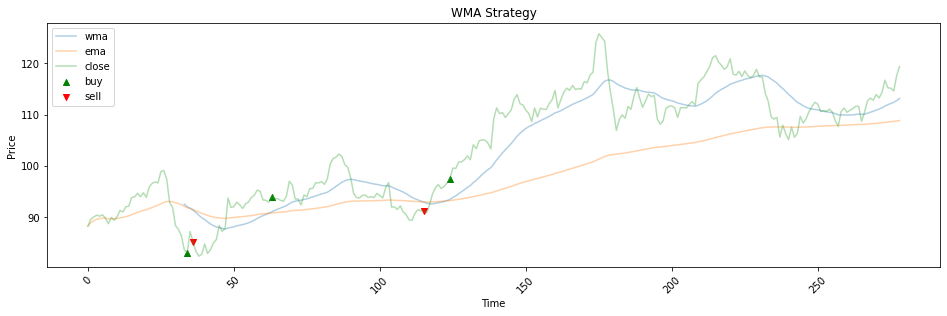

In [4]:
import strategy.strategy_wma as wma

df_wma = wma.prep_data(df, 34, 234)
test(10000, df_wma, wma.sell_or_buy)
wma.plot(df, True)

Balance: 10673.17 (Profit:6.73%, # of Trade:2, Win:50.00%, avg: win 7.41% / lose -6.55%)


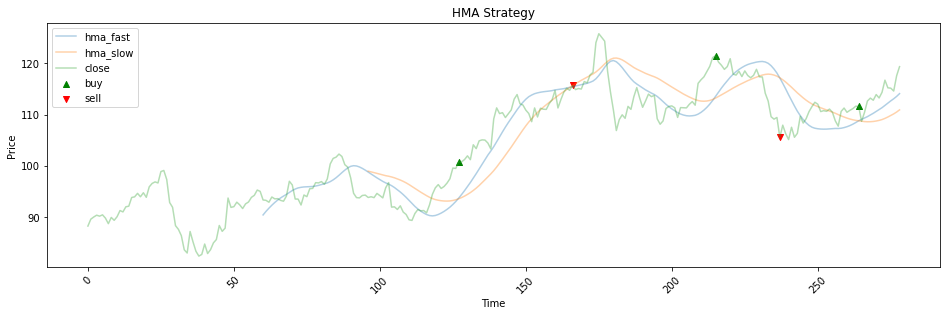

In [5]:
import strategy.strategy_hma as hma

df_hma = hma.prep_data(df, 55, 89)
a = test(10000, df_hma, hma.sell_or_buy)
hma.plot(df, True)

50: Buy 108 @ 92.02, balance = 61.840000000000146
94: Sell 108 @ 94.2, balance = 10235.44
122: Buy 106 @ 95.96, balance = 63.68000000000029
181: Sell 106 @ 106.87, balance = 11391.900000000001
213: Buy 95 @ 119.4, balance = 48.900000000001455
226: Sell 95 @ 117.62, balance = 11222.800000000001
270: Buy 98 @ 113.89, balance = 61.580000000001746
Balance: 11756.90 (Profit:17.57%, # of Trade:3, Win:66.67%, avg: win 4.58% / lose -0.50%)
{'open': 92.02, 'amount': 108, 'open_time': Timestamp('2020-06-16 00:00:00'), 'close': 94.2, 'close_time': Timestamp('2020-06-24 00:00:00'), 'profit': 0.023690502064768602}
{'open': 95.96, 'amount': 106, 'open_time': Timestamp('2020-06-30 00:00:00'), 'close': 106.87, 'close_time': Timestamp('2020-07-14 00:00:00'), 'profit': 0.11369320550229274}
{'open': 119.4, 'amount': 95, 'open_time': Timestamp('2020-07-20 00:00:00'), 'close': 117.62, 'close_time': Timestamp('2020-07-22 00:00:00'), 'profit': -0.01490787269681743}


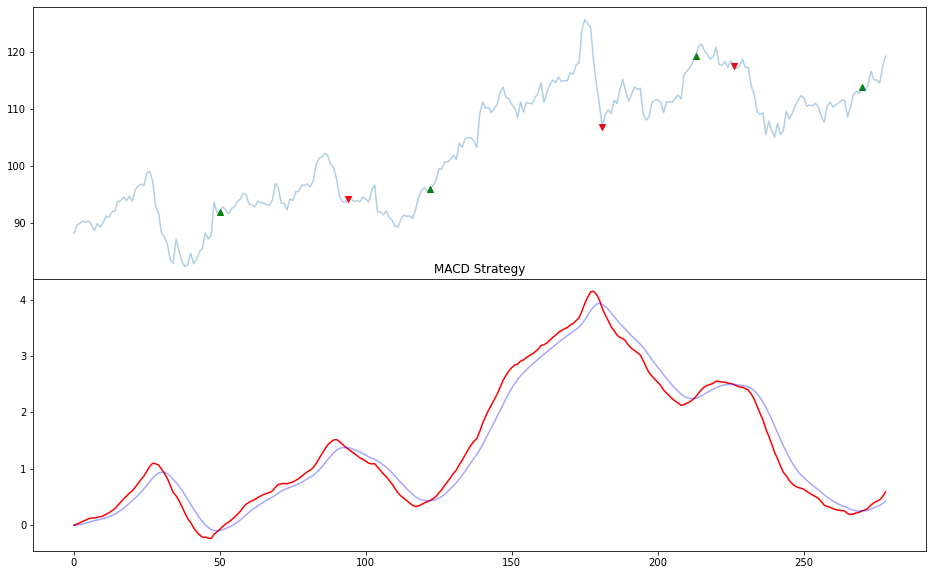

In [6]:
import strategy.strategy_macd as macd

df_macd = macd.prep_data(df, 55, 89)
test(10000, df_macd, macd.sell_or_buy, verbose = True)
macd.plot(df, True)

Balance: 18861.36 (Profit:88.61%, # of Trade:15, Win:86.67%, avg: win 4.96% / lose -0.51%)


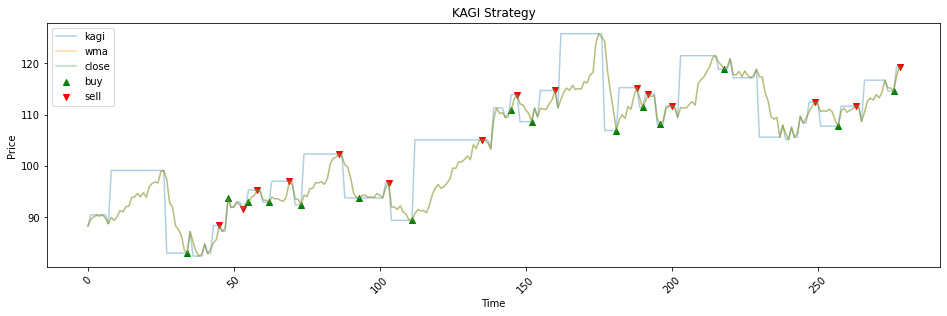

In [7]:
import strategy.strategy_kagi as kagi

df_kagi = kagi.prep_data(df, 0.01, 1)
test(10000, df_kagi, kagi.sell_or_buy, verbose=False)
kagi.plot(df, True)

Balance: 12020.58 (Profit:20.21%, # of Trade:5, Win:60.00%, avg: win 3.66% / lose -0.83%)


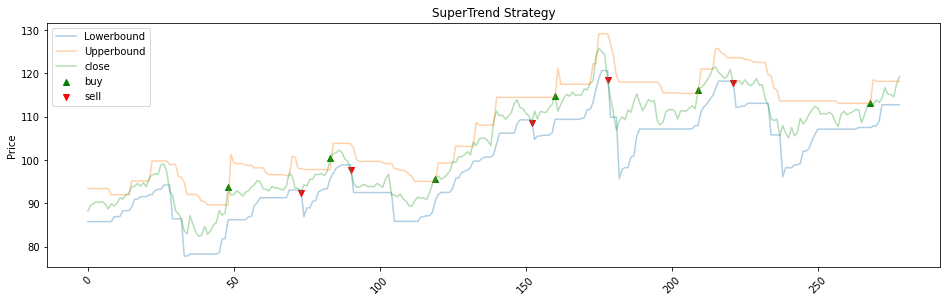

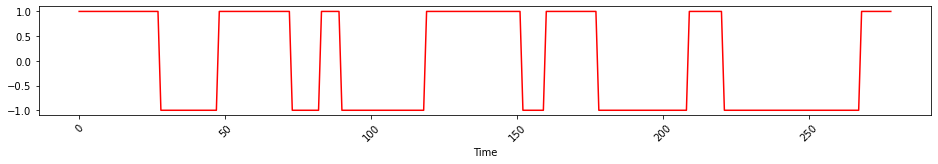

In [8]:
import strategy.strategy_supertrend as supertrend

st_df = supertrend.prep_data(df, 2.5, 8)
test(10000, st_df, supertrend.sell_or_buy)
supertrend.plot(df, True)

Balance: 11242.90 (Profit:12.43%, # of Trade:2, Win:0.00%, avg: win 0.00% / lose -0.96%)


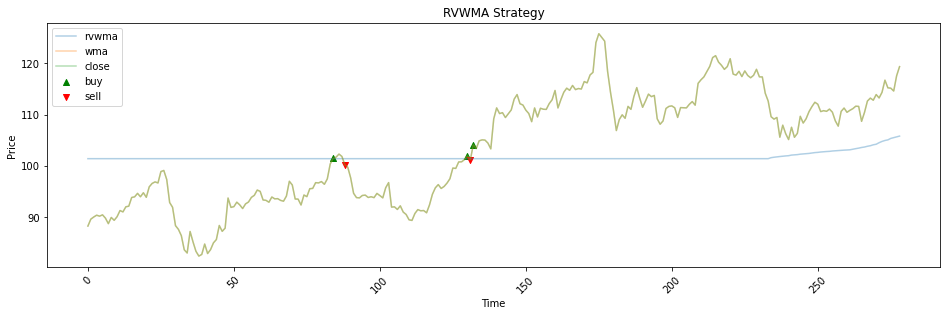

In [9]:
import strategy.strategy_rvwma as rvwma

df_rvwma = rvwma.prep_data(df, 234, 1)
test(10000, df_rvwma, rvwma.sell_or_buy)
rvwma.plot(df, True)

## Parameter Tuning

In [10]:
ticker_list = ['QQQ', 'VOO', 'AAPL', 'BA', 'COST']
period = "40d"
interval = "1h"

fib_seq = [1, 2, 3, 5, 8, 13, 21, 34, 55, 89, 144, 233, 377]
fib1_seq = [1, 2, 4, 6, 9, 14, 22, 35, 56, 90, 145, 234, 378]

Running Test for QQQ
Running Test for VOO
Running Test for AAPL
Running Test for BA
Running Test for COST


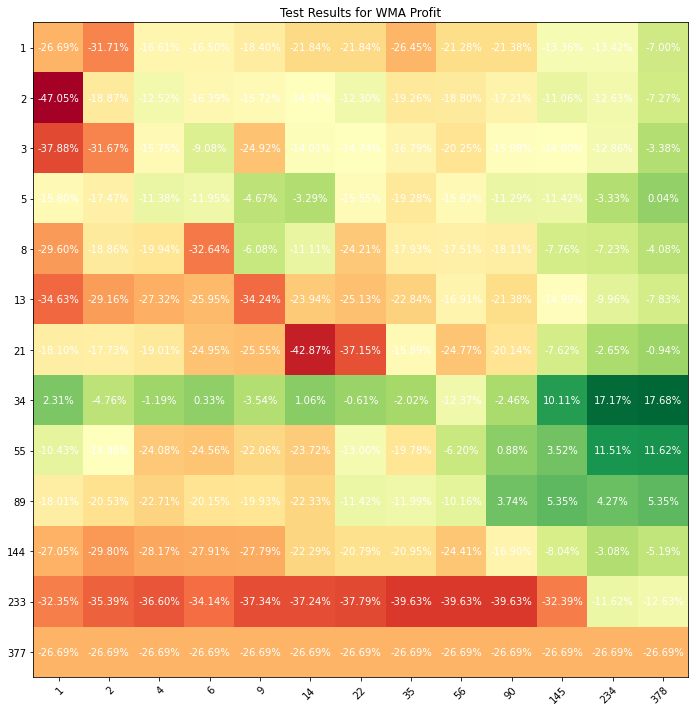

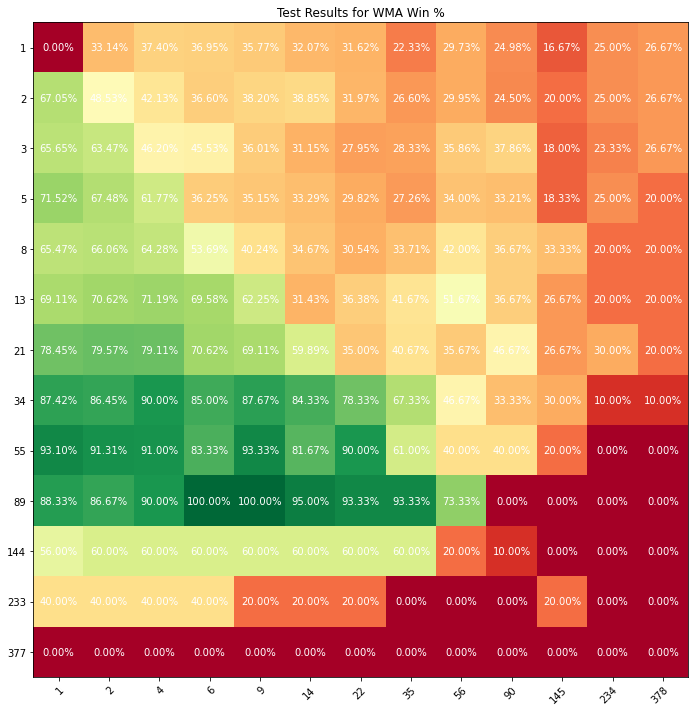

In [11]:
(p_results, w_results) = run_benchmark(ticker_list, fib_seq, fib1_seq, period, interval, wma)

total_p = np.zeros_like(p_results[0])
total_w = np.zeros_like(w_results[0])
for i in range(len(p_results)):
    total_p = np.add(p_results[i], total_p)
    total_w = np.add(w_results[i], total_w)
avg_w = total_w / len(w_results)  

plot_heatmap(total_p, "WMA Profit", fib_seq, fib1_seq)
plot_heatmap(avg_w, "WMA Win %", fib_seq, fib1_seq)

Running Test for QQQ
Running Test for VOO
Running Test for AAPL
Running Test for BA
Running Test for COST


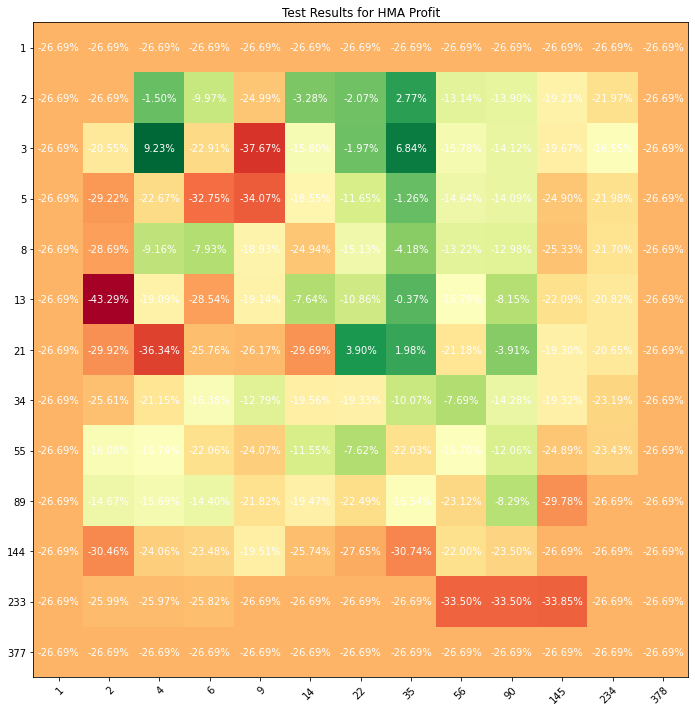

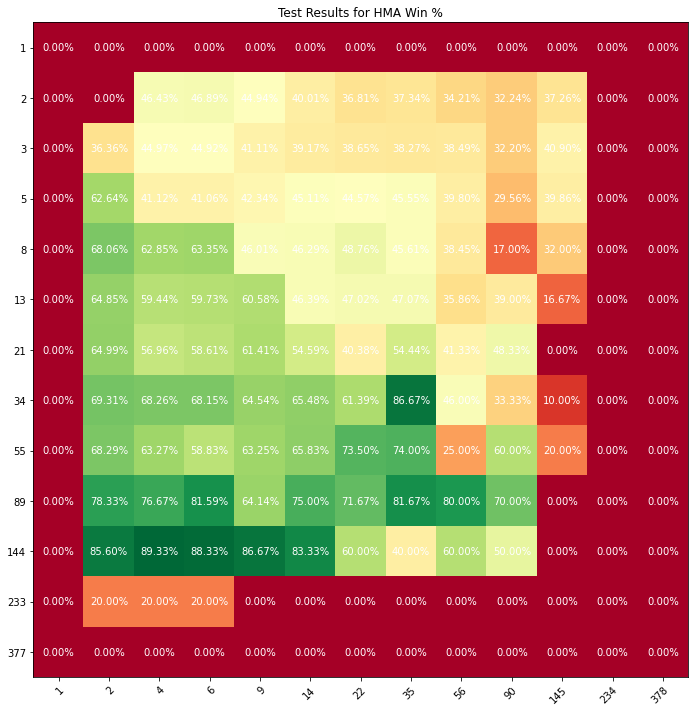

In [12]:
(p_results, w_results) = run_benchmark(ticker_list, fib_seq, fib1_seq, period, interval, hma)

total_p = np.zeros_like(p_results[0])
total_w = np.zeros_like(w_results[0])
for i in range(len(p_results)):
    total_p = np.add(p_results[i], total_p)
    total_w = np.add(w_results[i], total_w)
avg_w = total_w / len(w_results)  

plot_heatmap(total_p, "HMA Profit", fib_seq, fib1_seq)
plot_heatmap(avg_w, "HMA Win %", fib_seq, fib1_seq)

Running Test for QQQ
Running Test for VOO
Running Test for AAPL
Running Test for BA
Running Test for COST


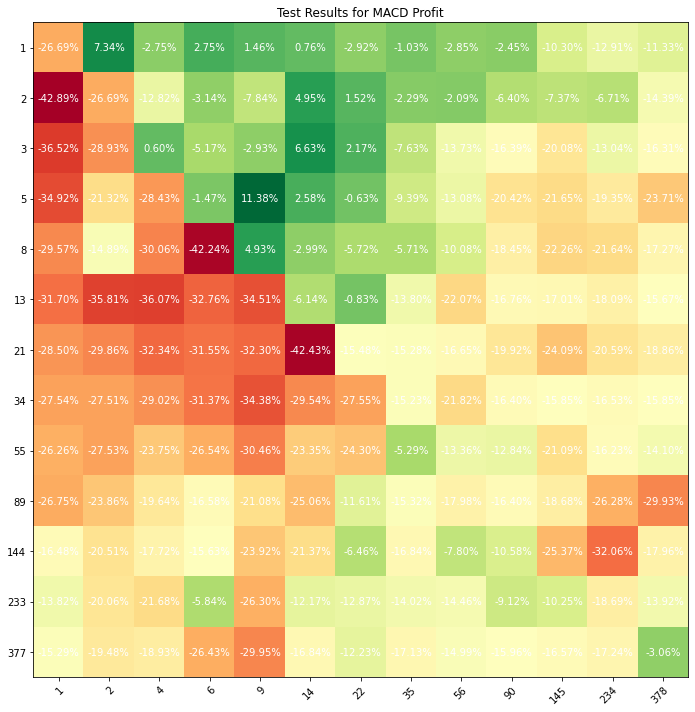

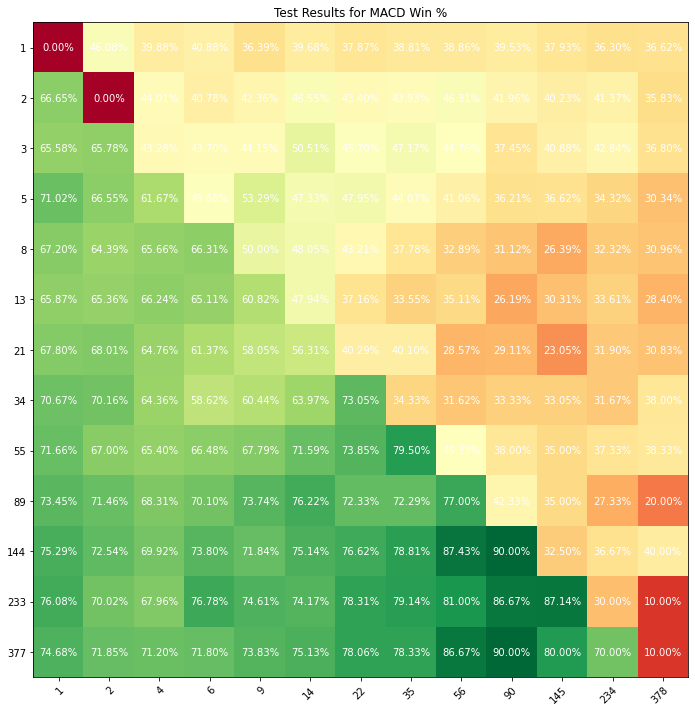

In [13]:
(p_results, w_results) = run_benchmark(ticker_list, fib_seq, fib1_seq, period, interval, macd)

total_p = np.zeros_like(p_results[0])
total_w = np.zeros_like(w_results[0])
for i in range(len(p_results)):
    total_p = np.add(p_results[i], total_p)
    total_w = np.add(w_results[i], total_w)
avg_w = total_w / len(w_results)    

plot_heatmap(total_p, "MACD Profit", fib_seq, fib1_seq)
plot_heatmap(avg_w, "MACD Win %", fib_seq, fib1_seq)

Running Test for QQQ
Running Test for VOO
Running Test for AAPL
Running Test for BA
Running Test for COST


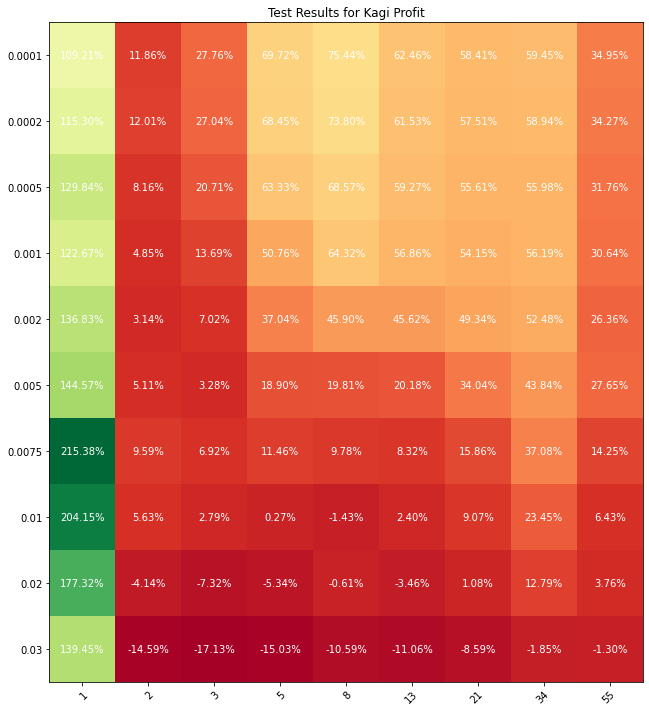

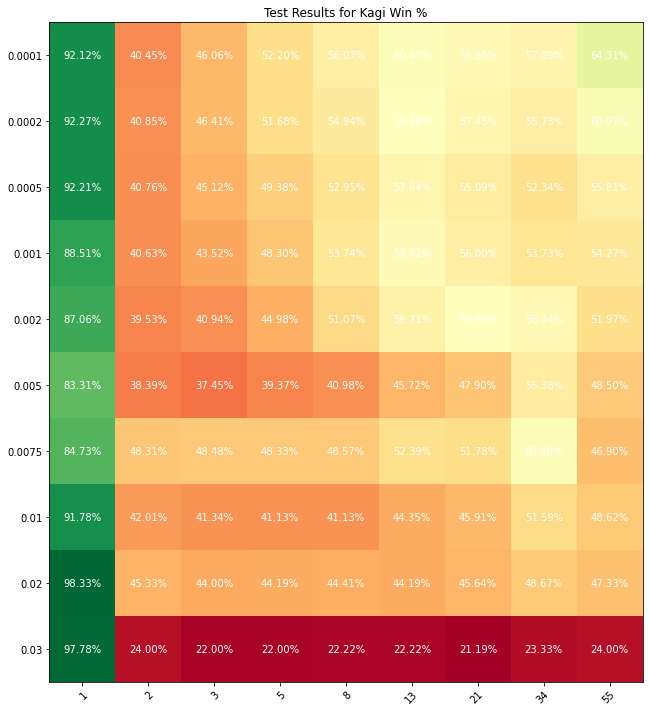

In [14]:
reversal = [0.0001, 0.0002, 0.0005, 0.001, 0.002, 0.005, 0.0075, 0.01, 0.02, 0.03]
fib_seq = [1, 2, 3, 5, 8, 13, 21, 34, 55]


(p_results, w_results) = run_benchmark(ticker_list, reversal, fib_seq, period, interval, kagi)

total_p = np.zeros_like(p_results[0])
total_w = np.zeros_like(w_results[0])
for i in range(len(p_results)):
    total_p = np.add(p_results[i], total_p)
    total_w = np.add(w_results[i], total_w)
avg_w = total_w / len(w_results)    

plot_heatmap(total_p, "Kagi Profit", reversal, fib_seq)
plot_heatmap(avg_w, "Kagi Win %", reversal, fib_seq)


Running Test for QQQ
Running Test for VOO
Running Test for AAPL
Running Test for BA
Running Test for COST


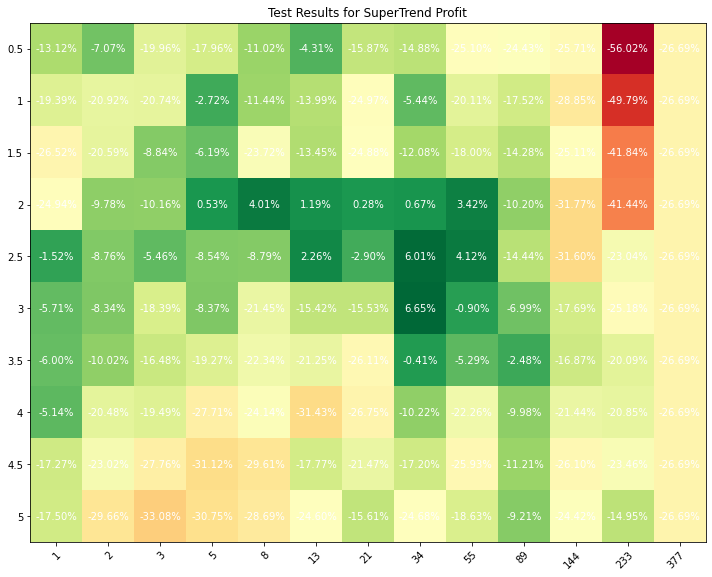

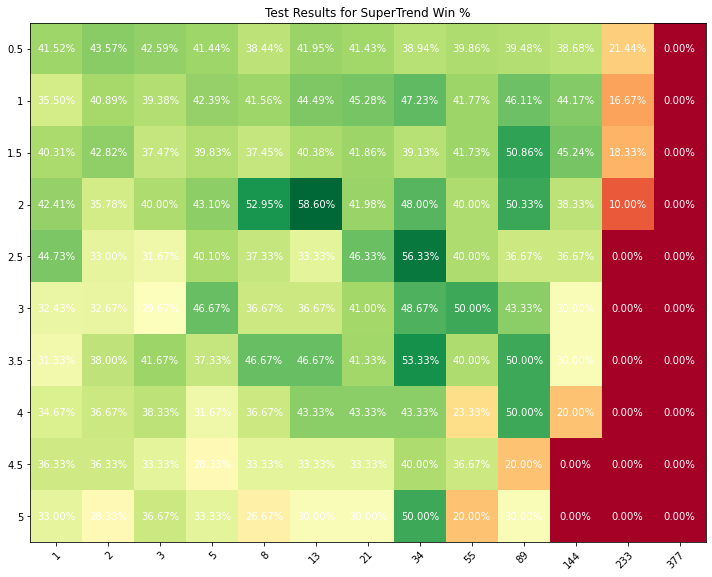

In [15]:
multipiler = [0.5, 1, 1.5, 2, 2.5, 3, 3.5, 4, 4.5, 5]
fib_seq = [1, 2, 3, 5, 8, 13, 21, 34, 55, 89, 144, 233, 377]

(p_results, w_results) = run_benchmark(ticker_list, multipiler, fib_seq, period, interval, supertrend)

total_p = np.zeros_like(p_results[0])
total_w = np.zeros_like(w_results[0])
for i in range(len(p_results)):
    total_p = np.add(p_results[i], total_p)
    total_w = np.add(w_results[i], total_w)
avg_w = total_w / len(w_results)

plot_heatmap(total_p, "SuperTrend Profit", multipiler, fib_seq)
plot_heatmap(avg_w, "SuperTrend Win %", multipiler, fib_seq)

Running Test for QQQ
Running Test for VOO
Running Test for AAPL
Running Test for BA
Running Test for COST


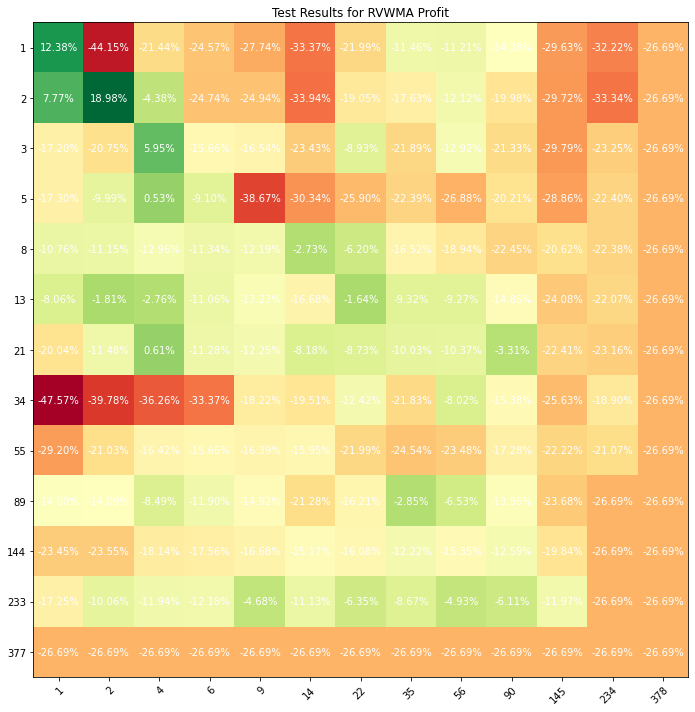

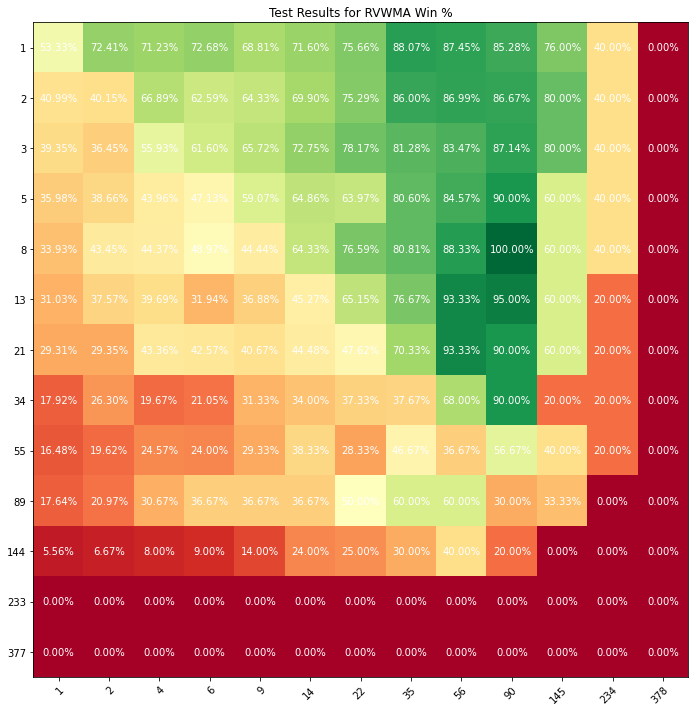

In [16]:
(p_results, w_results) = run_benchmark(ticker_list, fib_seq, fib1_seq, period, interval, rvwma)

total_p = np.zeros_like(p_results[0])
total_w = np.zeros_like(w_results[0])
for i in range(len(p_results)):
    total_p = np.add(p_results[i], total_p)
    total_w = np.add(w_results[i], total_w)
avg_w = total_w / len(w_results)

plot_heatmap(total_p, "RVWMA Profit", fib_seq, fib1_seq)
plot_heatmap(avg_w, "RVWMA Win %", fib_seq, fib1_seq)

## Verification

In [17]:
tickers = ['TQQQ','AMD', 'W', 'UAL']

for ticker in tickers:
    df, last_update = refresh(ticker, "240d", "1h")
    
    print("Testing '{}'...".format(ticker))
    print("    WMA: \t",end='')
    test(10000, wma.prep_data(df, 5, 13), wma.sell_or_buy) # verified
    print("    HMA: \t",end='')
    test(10000, hma.prep_data(df, 5, 13), hma.sell_or_buy) # verified
    print("    MACD: \t",end='')
    test(10000, macd.prep_data(df, 5, 13), macd.sell_or_buy) # verified
    print("    Kagi: \t",end='')
    test(10000, kagi.prep_data(df, 0.01, 1), kagi.sell_or_buy) # verified
    print("    ST: \t",end='')
    test(10000, supertrend.prep_data(df, 2.5, 13), supertrend.sell_or_buy) # verified
    print("    RVWMA: \t",end='')
    test(10000, rvwma.prep_data(df, 21, 13), rvwma.sell_or_buy) # verified
    print("    Buy&Hold: \t",end='')
    buy_n_hold(10000, df)

Testing 'TQQQ'...
    WMA: 	Balance: 25790.61 (Profit:157.91%, # of Trade:54, Win:46.30%, avg: win 2.82% / lose -0.98%)
    HMA: 	Balance: 17963.39 (Profit:79.63%, # of Trade:172, Win:50.00%, avg: win 1.49% / lose -1.07%)
    MACD: 	Balance: 24832.81 (Profit:148.33%, # of Trade:95, Win:54.74%, avg: win 2.35% / lose -1.29%)
    Kagi: 	Balance: 721922.07 (Profit:7119.22%, # of Trade:105, Win:83.81%, avg: win 4.98% / lose -0.63%)
    ST: 	Balance: 19352.76 (Profit:93.53%, # of Trade:37, Win:59.46%, avg: win 3.41% / lose -1.55%)
    RVWMA: 	Balance: 17704.84 (Profit:77.05%, # of Trade:36, Win:52.78%, avg: win 3.33% / lose -1.69%)
    Buy&Hold: 	Asset: 19454.00 (Profit:94.54%)
Testing 'AMD'...
    WMA: 	Balance: 14178.53 (Profit:41.79%, # of Trade:62, Win:33.87%, avg: win 1.82% / lose -1.15%)
    HMA: 	Balance: 14311.76 (Profit:43.12%, # of Trade:192, Win:45.83%, avg: win 0.96% / lose -0.75%)
    MACD: 	Balance: 15924.36 (Profit:59.24%, # of Trade:98, Win:47.96%, avg: win 1.60% / lose -1.05